Libraries


In [31]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers



Fetching the dataset

In [33]:
housing=fetch_california_housing(as_frame=True)
X = pd.DataFrame(data=housing.data, columns=housing.feature_names)
y = pd.DataFrame(data=housing.target, columns=['MedHouseVal'])



(20640, 8)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716

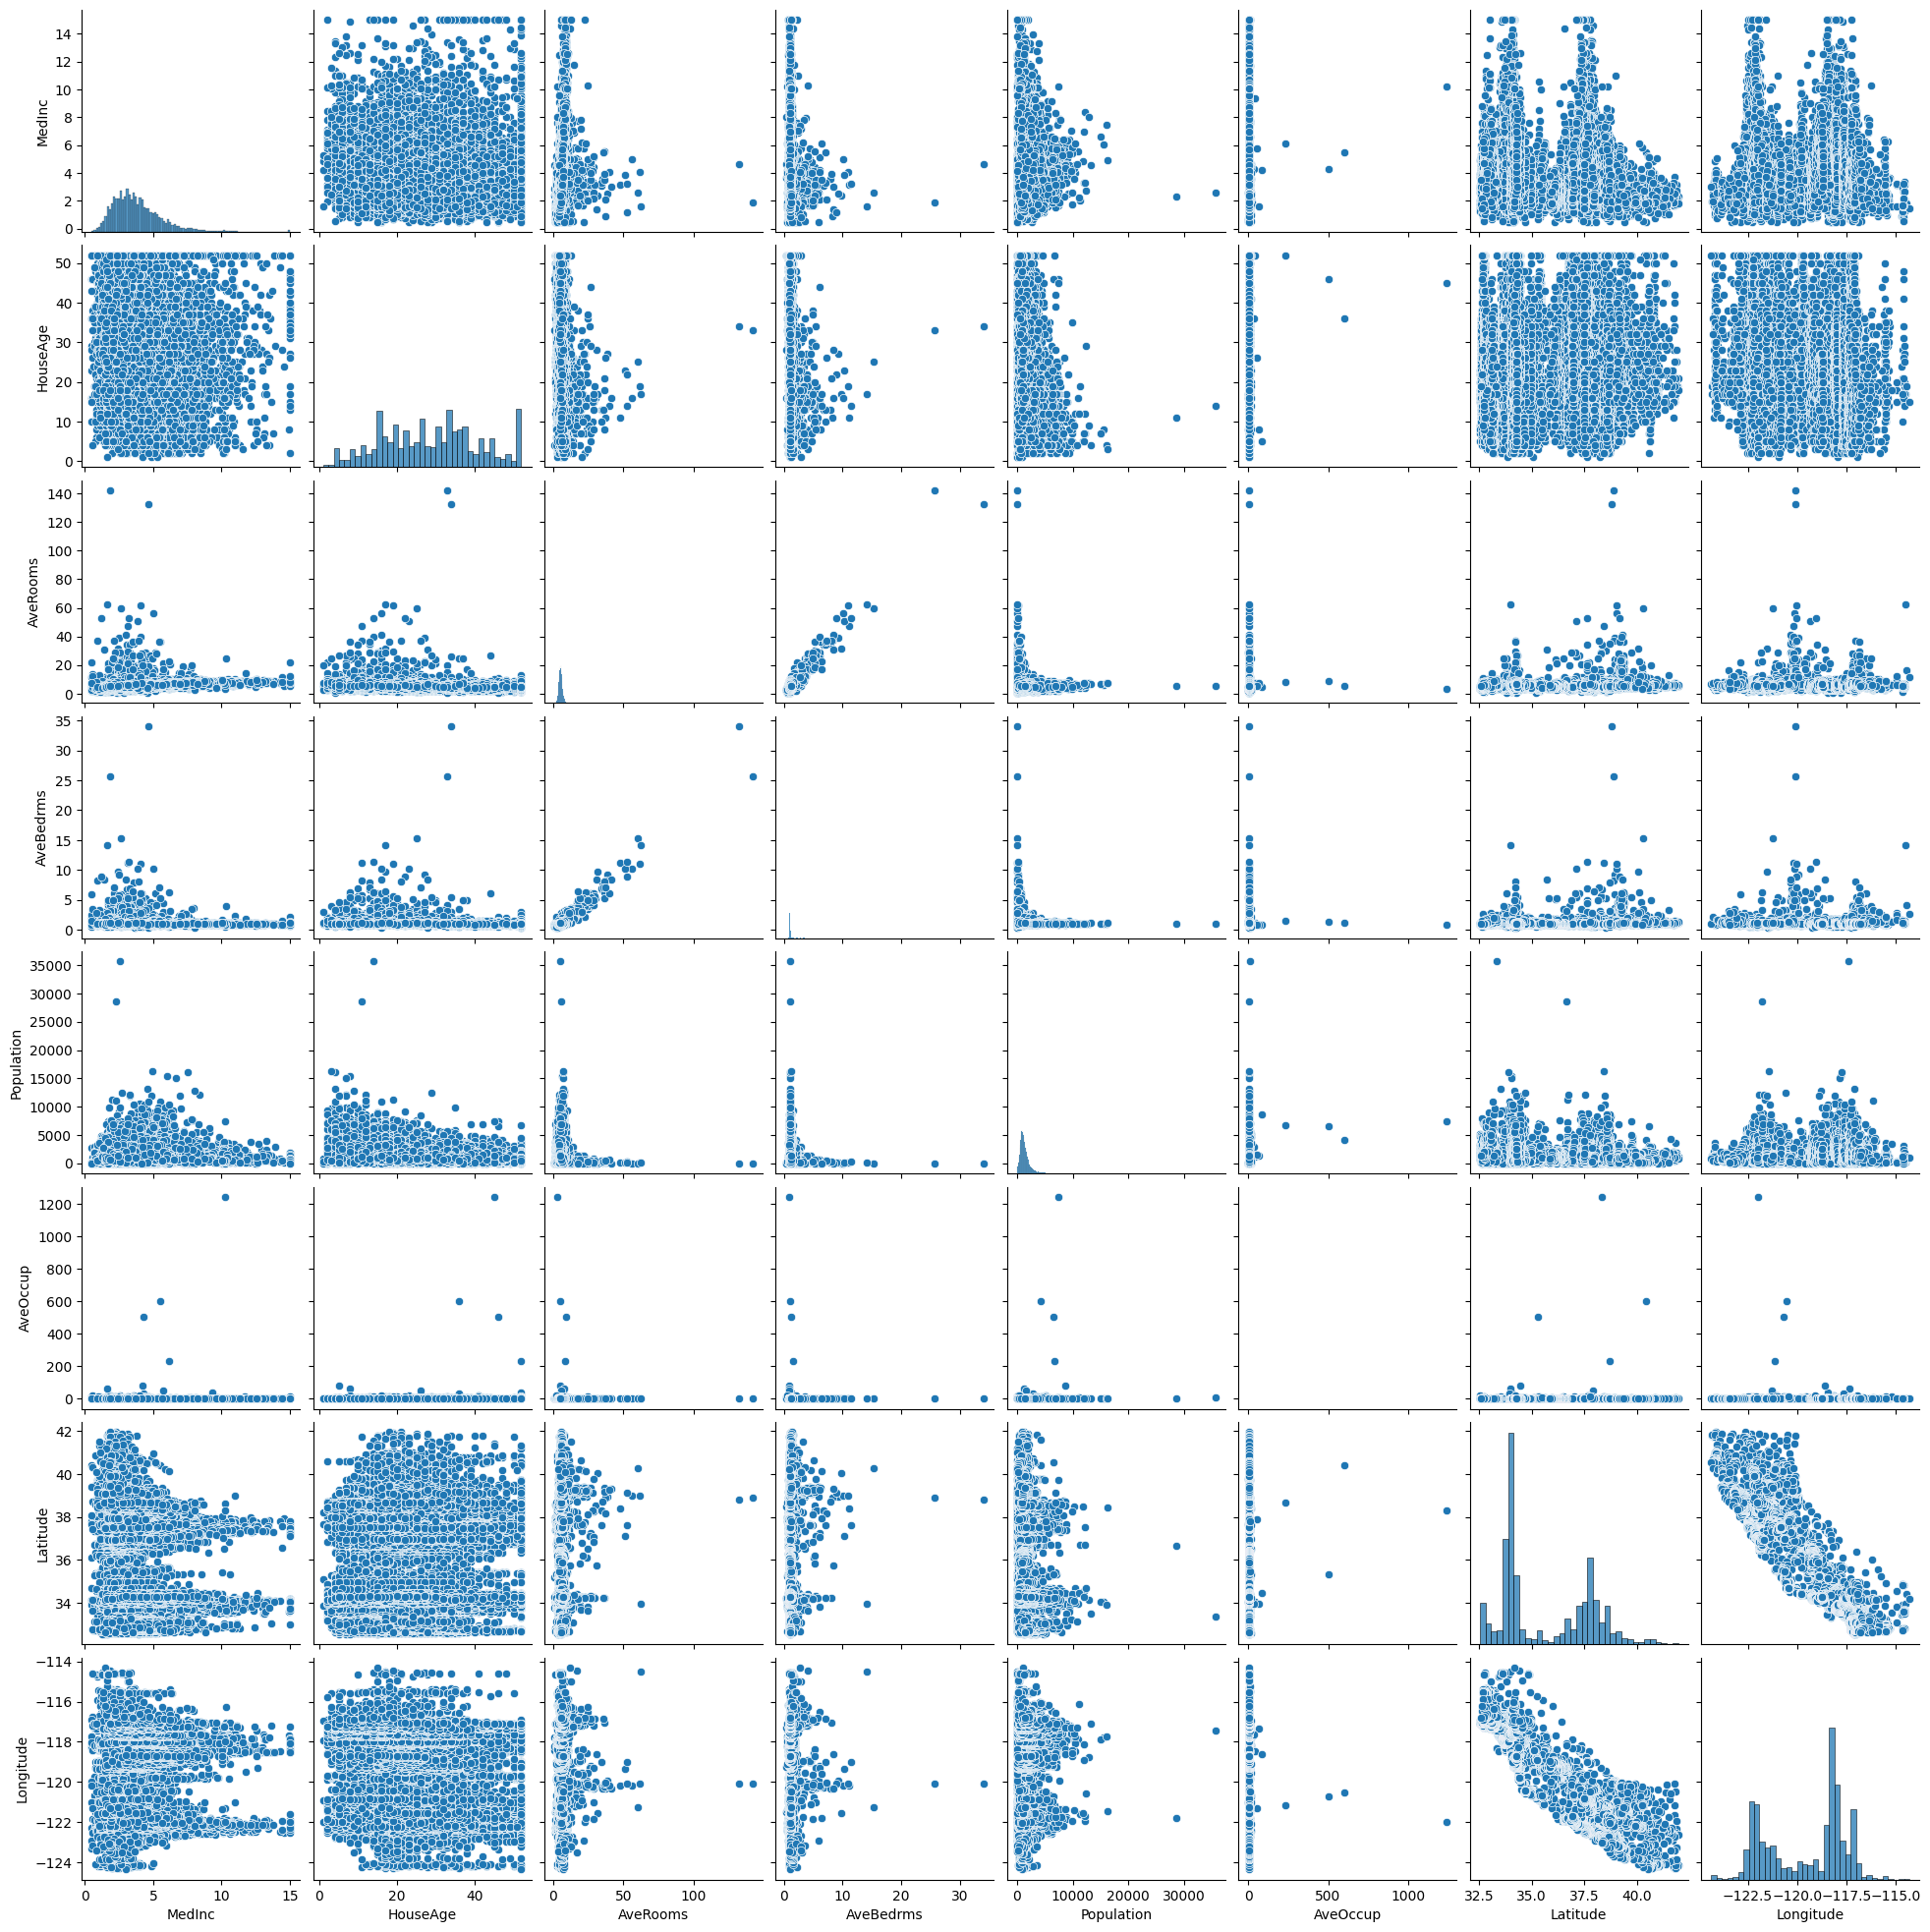

In [34]:
print(X.shape)
print(X.head())
print(X.describe())
print(X.isna().any())
sns.pairplot(X)
plt.show()

In [35]:
correlation_matrix = X.corr()
# Check the available columns in the correlation matrix
print(correlation_matrix.columns)

# Assuming 'MedHouseVal' is in a separate DataFrame called 'y':
correlations_with_target = X.corrwith(y['MedHouseVal'])
print(correlations_with_target.sort_values(ascending=False))

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
dtype: float64


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [37]:
print(X_train.shape)

(14448, 8)


ANN

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = Sequential()
#input layer
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1]))
# Adding the hidden layer with N neurons and sigmoid activation function
N = 10  # Number of neurons in the hidden layer (you can adjust this number)
model.add(Dense(N, activation='sigmoid'))
#output layer
model.add(Dense(1))


h:\python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling the model with Gradient Descent

In [39]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')
history_gd = model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0,  batch_size=len(X_train))

Compiling the model with Stochastic Gradient Descent

In [40]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss= 'mse')
history_sgd = model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0, batch_size=1)

Compiling the model with Adam optimizer

In [41]:
model.compile(optimizer='adam', loss='mse')
history_adam = model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0)

Plotting the results

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step


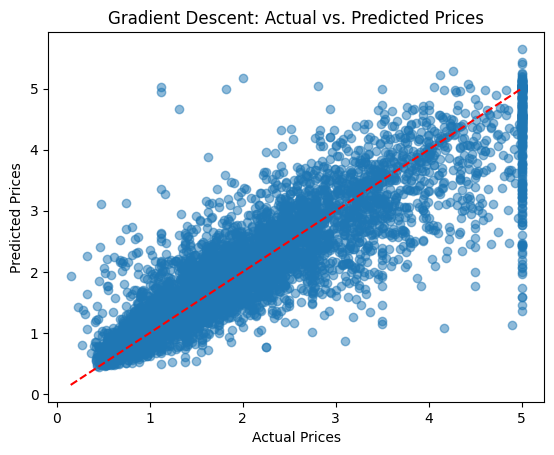

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


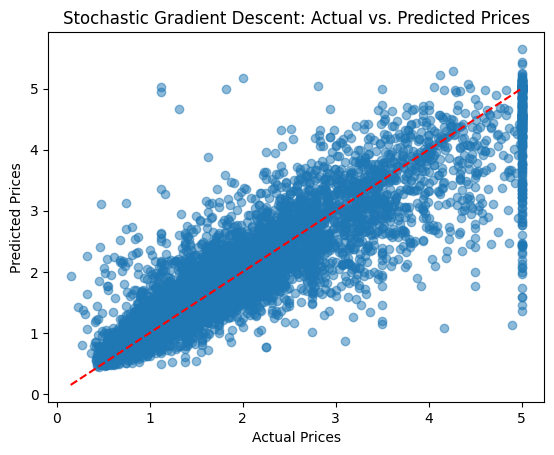

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step


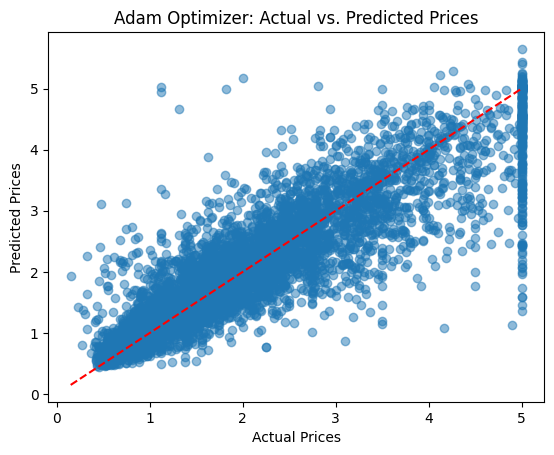

In [42]:
def plot_actual_vs_predicted(model, X_test, y_test, title):
    y_pred = model.predict(X_test).flatten()
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(title)
    plt.show()

# Plot for Gradient Descent
plot_actual_vs_predicted(model, X_test, y_test, 'Gradient Descent: Actual vs. Predicted Prices')

# Plot for Stochastic Gradient Descent
plot_actual_vs_predicted(model, X_test, y_test, 'Stochastic Gradient Descent: Actual vs. Predicted Prices')

# Plot for Adam Optimizer
plot_actual_vs_predicted(model, X_test, y_test, 'Adam Optimizer: Actual vs. Predicted Prices')

Plotting the Learning curve

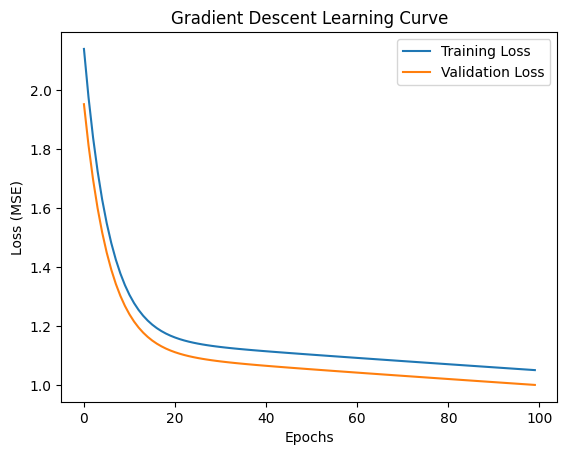

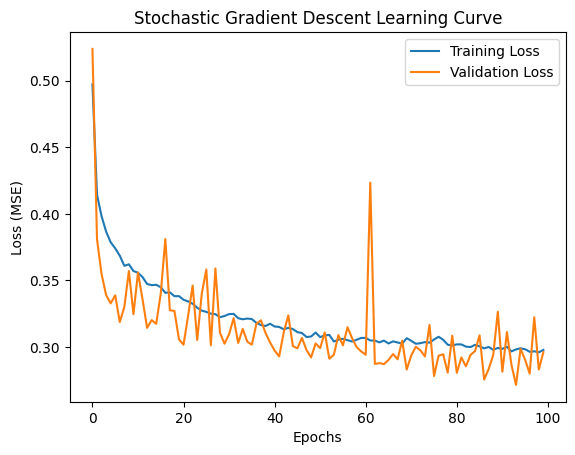

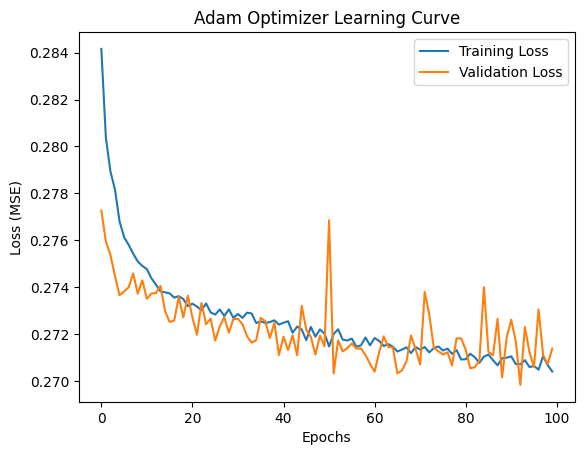

In [43]:
def plot_learning_curve(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot learning curves
plot_learning_curve(history_gd, 'Gradient Descent Learning Curve')
plot_learning_curve(history_sgd, 'Stochastic Gradient Descent Learning Curve')
plot_learning_curve(history_adam, 'Adam Optimizer Learning Curve')